In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as lm
import sys
sys.path.append('C:\\Users\\rcalde1\\Python_Columbia\\Final_project')
import exp


#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split
#the given problem is a classificaton problem. Hence linear regression is used for ML algorithm
from sklearn.linear_model import LinearRegression

In [2]:
file = "dataset_10K.csv"
tds1 = pd.read_csv(file)
tds1 = tds1[['Artist', 'Track','popularity','acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]
tds1.head()

,Artist,Track,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,casual,I Didn't Mean To,21,0.063,0.751,218933,0.549,0.000025,6,0.1060,-10.508,0,0.4290,92.224,4,0.553
1,Casual,I Didn't Mean To,21,0.063,0.751,218933,0.549,0.000025,6,0.1060,-10.508,0,0.4290,92.224,4,0.553
2,The Box Tops,Soul Deep,37,0.195,0.749,147760,0.530,0.000035,9,0.0748,-12.940,1,0.0326,121.395,4,0.966
3,Sonora Santanera,Amor De Cabaret,50,0.689,0.699,183027,0.519,0.000471,8,0.9350,-6.422,1,0.0290,102.463,4,0.676
4,Adam Ant,Something Girls,19,0.218,0.606,232107,0.937,0.005870,0,0.1630,-3.808,1,0.0443,120.135,4,0.853


In [3]:
#tds1 = tds1.head(5000)
tds1.shape

(6850, 16)

# Linear Regression

## Define Datasets 

In [4]:
#Combined Dataset
dfcombine = tds1
#dfcombine = dfcombine.reset_index(inplace=True, drop=True)

#Target Dataset
dfy = pd.DataFrame(tds1["popularity"])

#all the independant variables/predictors are named as dfx
dfx = dfcombine.drop(columns=['Artist', 'Track','popularity'])
dfx.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.063,0.751,218933,0.549,0.000025,6,0.1060,-10.508,0,0.4290,92.224,4,0.553
1,0.063,0.751,218933,0.549,0.000025,6,0.1060,-10.508,0,0.4290,92.224,4,0.553
2,0.195,0.749,147760,0.530,0.000035,9,0.0748,-12.940,1,0.0326,121.395,4,0.966
3,0.689,0.699,183027,0.519,0.000471,8,0.9350,-6.422,1,0.0290,102.463,4,0.676
4,0.218,0.606,232107,0.937,0.005870,0,0.1630,-3.808,1,0.0443,120.135,4,0.853


In [6]:
dfy.shape

(6850, 1)

## Train Set  - Linear Regression 

In [8]:
dfx.reset_index(inplace=True, drop=True)
dfy.reset_index(inplace=True, drop=True)
dfy.shape

(6850, 1)

In [6]:
#Copy the code from Brooklyn 4.0 to set up the model as far as possible....

In [9]:
#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)

In [10]:
# linear regression 
from sklearn.linear_model import LinearRegression
linR = LinearRegression()
linR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#the target is predicted for the test dataset
predictions = linR.predict(X_test)
#the accuracy of the prediction is found to be.... 
linR.score(X_test,y_test)

0.05751988909164396

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.05751988909164396

In [19]:
X_train 

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1963,0.093200,0.5620,194227,0.7720,0.000000,10,0.0873,-4.068,1,0.0362,148.126,4,0.7700
4148,0.363000,0.6760,143907,0.3320,0.000002,7,0.2690,-12.837,1,0.0267,77.078,4,0.4750
4626,0.994000,0.4740,150987,0.1820,0.028700,2,0.3070,-14.378,1,0.0430,42.436,4,0.2610
5781,0.002920,0.3910,500400,0.8790,0.695000,7,0.4030,-4.931,0,0.1230,144.877,4,0.3700
485,0.845000,0.3720,158373,0.3670,0.942000,2,0.0852,-16.568,1,0.0374,139.169,4,0.3780
3649,0.000069,0.5270,265760,0.9960,0.811000,5,0.6570,-8.388,1,0.0380,127.991,4,0.6000
6736,0.679000,0.6420,155467,0.6860,0.000451,0,0.2490,-5.847,1,0.0484,117.991,4,0.8600
30,0.443000,0.5620,200026,0.9160,0.000000,5,0.9030,-8.781,1,0.2700,128.938,4,0.7090
1879,0.769000,0.5660,174187,0.4610,0.019400,7,0.2840,-7.374,1,0.0288,125.777,4,0.6260
5710,0.956000,0.5030,285232,0.3730,0.909000,7,0.6340,-19.266,1,0.1050,81.202,4,0.7120


In [20]:
y_train 

,popularity
1963,51
4148,14
4626,0
5781,10
485,11
3649,1
6736,18
30,13
1879,15
5710,0


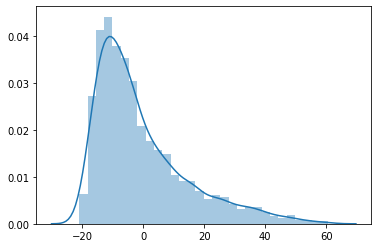

In [50]:
error = y_test - predictions
#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error)

In [51]:
dfx.shape

(6850, 13)

## RMSE Model with Plot

In [15]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 15.60185137536088
RMSE on Test set : 15.152430746347353


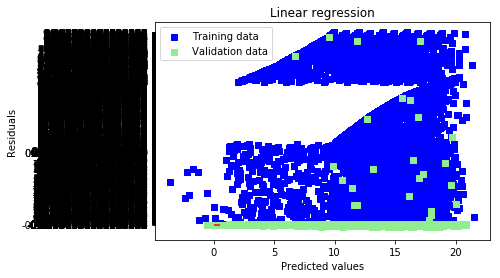

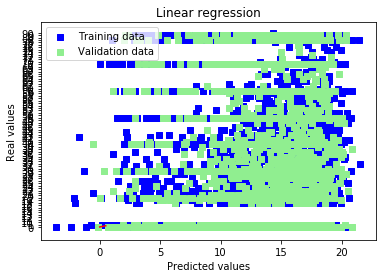

In [16]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 0.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 0.5], [0, 0.5], c = "red")
plt.show()

## Once More Run - with fewer variables

In [17]:
dfx2 = dfx.drop(['time_signature','key'], axis = 1)
dfx2.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0.063,0.751,218933,0.549,0.000025,0.1060,-10.508,0,0.4290,92.224,0.553
1,0.063,0.751,218933,0.549,0.000025,0.1060,-10.508,0,0.4290,92.224,0.553
2,0.195,0.749,147760,0.530,0.000035,0.0748,-12.940,1,0.0326,121.395,0.966
3,0.689,0.699,183027,0.519,0.000471,0.9350,-6.422,1,0.0290,102.463,0.676
4,0.218,0.606,232107,0.937,0.005870,0.1630,-3.808,1,0.0443,120.135,0.853


In [18]:
#OLS Regression
lir_ols = lm.OLS(endog = dfy, exog = dfx2).fit()
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.441
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              490.3
Date:                Sat, 11 Apr 2020   Prob (F-statistic):                        0.00
Time:                        00:34:18   Log-Likelihood:                         -28528.
No. Observations:                6850   AIC:                                  5.708e+04
Df Residuals:                    6839   BIC:                                  5.715e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness        -0.5331      0.705     -0.756      0.450      -1.916       0.850
danceability         9.5679      1.183      8.088      0.000       7.249      11.887
duration_ms       4.787e-06   1.74e-06      2.744      0.006    1.37e-06    8.21e-06
energy              12.1480      1.022     11.889      0.000      10.145      14.151
instrumentalness    -8.5255      0.642    -13.287      0.000      -9.783      -7.268
liveness            -0.7167      1.015     -0.706      0.480      -2.706       1.273
loudness            -0.1770      0.048     -3.694      0.000      -0.271      -0.083
mode                 0.1664      0.406      0.410      0.682      -0.629       0.962
speechiness         -6.8751      1.565     -4.393      0.000      -9.943      -3.807
tempo                0.0273      0.006      4.756      0.000       0.016       0.039
valence             -5.4713      0.925     -5.912      0.000      -7.285      -3.657
==============================================================================
Omnibus:                     1400.818   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2503.315
Skew:                           1.309   Prob(JB):                         0.00
Kurtosis:                       4.384   Cond. No.                     2.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfx2, dfy, test_size=0.3, random_state=42)
linR2 = LinearRegression()
linR2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#the target is predicted for the test dataset
predictions = linR2.predict(X_test2)
#the accuracy of the prediction is found to be.... 
linR2.score(X_test2,y_test2)

0.05624655683176227

NameError: name 'sklearn' is not defined

## Next Steps - Normalisation

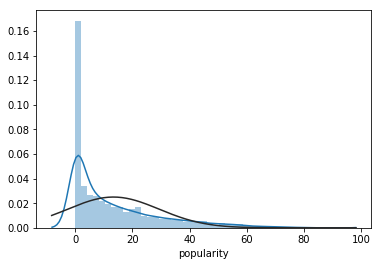

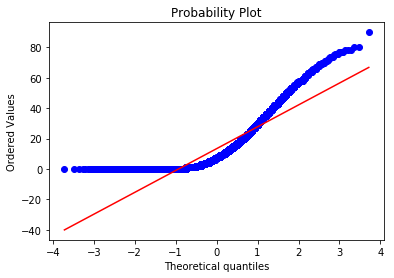

In [21]:
#histogram and normal probability plot
sns.distplot(tds1['popularity'], fit=norm);
fig = plt.figure()
res = stats.probplot(tds1['popularity'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


OverflowError: cannot convert float infinity to integer

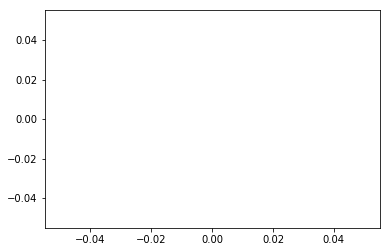

In [22]:
#applying log transformation
y_lg = np.log(tds1['acousticness'])

#transformed histogram and normal probability plot
sns.distplot(y_lg, fit=norm);
fig = plt.figure()
res = stats.probplot(y_lg, plot=plt)
fig

# Classification Models 

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

##  Dataframe & Feature Set-up 

In [67]:
dataframe = tds1[['popularity','acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]
dataframe = dataframe
dataframe.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,21,0.063,0.751,218933,0.549,0.000025,6,0.1060,-10.508,0,0.4290,92.224,4,0.553
1,21,0.063,0.751,218933,0.549,0.000025,6,0.1060,-10.508,0,0.4290,92.224,4,0.553
2,37,0.195,0.749,147760,0.530,0.000035,9,0.0748,-12.940,1,0.0326,121.395,4,0.966
3,50,0.689,0.699,183027,0.519,0.000471,8,0.9350,-6.422,1,0.0290,102.463,4,0.676
4,19,0.218,0.606,232107,0.937,0.005870,0,0.1630,-3.808,1,0.0443,120.135,4,0.853


In [41]:
#trying to get rid of >ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
np.where(dataframe.values >= np.finfo(np.float64).max)
np.isnan(dataframe.values.any())
dataframe.replace([np.inf, -np.inf], np.nan, inplace=True)

In [77]:
dataframe= dataframe[dataframe.popularity != 0]
dataframe= dataframe[dataframe.popularity != 1]
dataframe= dataframe[dataframe.popularity != 2]
dataframe= dataframe[dataframe.popularity != 3]
dataframe= dataframe[dataframe.popularity != 4]
dataframe= dataframe[dataframe.popularity != 5]
dataframe= dataframe[dataframe.popularity != 6]
dataframe= dataframe[dataframe.popularity != 7]
dataframe= dataframe[dataframe.popularity != 8]
dataframe= dataframe[dataframe.popularity != 9]
dataframe= dataframe[dataframe.popularity != 10]


Text(0.5, 1.0, 'Popularity Distribution')

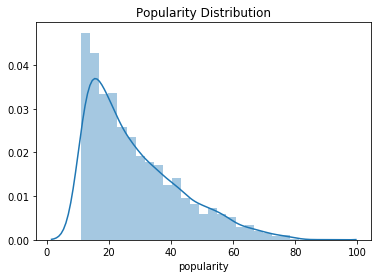

In [78]:
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

In [79]:
dataframe.loc[dataframe['popularity'] == 0]
dataframe.shape

(2883, 14)

In [8]:
dataframe['popularity'].value_counts()

0     118
1      39
3      24
2      20
10     17
12     16
7      15
4      15
11     14
5      12
16     11
8      10
9      10
13     10
19      8
21      8
22      7
20      6
15      6
6       6
35      6
14      5
23      5
24      5
25      5
27      5
34      5
32      5
37      4
42      4
     ... 
36      3
47      3
45      3
44      3
18      3
41      3
40      3
31      3
39      3
51      2
58      2
57      2
56      2
43      2
53      2
54      2
38      2
50      1
49      1
55      1
33      1
71      1
63      1
65      1
66      1
67      1
68      1
69      1
70      1
72      1
Name: popularity, Length: 66, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


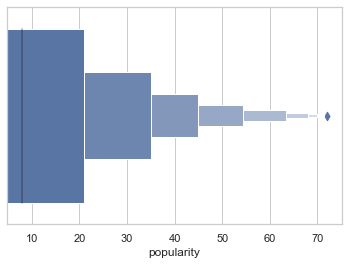

In [101]:
import seaborn as sns

sns.set(style="whitegrid")

tips = sns.load_dataset("tips")

ax = sns.boxenplot(x=dataframe['popularity'])

In [10]:
#Convert popularity to binary varible. 
#we will define above 20 as "popular" since that's the border of the top 25% of songs and encode that as 1,
#and below 75 as "not popular" and encode that as 0.

dataframe.loc[dataframe['popularity'] < 20, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 20, 'popularity'] = 1
#dataframe.loc[dataframe['popularity'] == 0]


In [11]:
dataframe['popularity'].value_counts()

0    362
1    138
Name: popularity, dtype: int64

In [103]:
features = ["danceability", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [104]:
#Next we define 80% of the dataframe for training and 20% of the dataframe for testing.
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

In [96]:
#We add a validation dataset using train_test_split.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

## Logistic Regresssion 

In [105]:
#Logistic Regression
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.78125
AUC: 0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## RandomForestClassifier

In [106]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.71875
AUC: 0.46


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## K-Nearest Neighbors Classifier

In [107]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.6875
AUC: 0.49142857142857144


## Decision Tree Classifier

In [108]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.59375
AUC: 0.48285714285714276


## Model Performance Summary

In [109]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      ],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC]})

In [110]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)


,Model,Accuracy
0,LogisticRegression,0.78125
1,RandomForestClassifier,0.71875
2,KNeighborsClassifier,0.68750
3,DecisionTreeClassifier,0.59375


In [111]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

,Model,AUC
0,LogisticRegression,0.500000
2,KNeighborsClassifier,0.491429
3,DecisionTreeClassifier,0.482857
1,RandomForestClassifier,0.460000
